# Рубежный контроль №1
Вариант №3, набор данных №2.

## Задание
Для&nbsp;заданного набора данных произведите масштабирование данных (для&nbsp;одного признака) и преобразование категориальных признаков в&nbsp;количественные двумя способами (label encoding, one hot encoding) для&nbsp;одного признака. Какие методы Вы использовали для&nbsp;решения задачи и почему?

## Решение

### Загрузка и предобработка данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("dc-wikia-data.csv")

In [3]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [4]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [5]:
data.shape

(6896, 13)

In [6]:
data.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [7]:
d = data[["name", "SEX", "APPEARANCES"]]
d = d.dropna(axis=0, how="any")

In [8]:
d.head()

,name,SEX,APPEARANCES
0,Batman (Bruce Wayne),Male Characters,3093.0
1,Superman (Clark Kent),Male Characters,2496.0
2,Green Lantern (Hal Jordan),Male Characters,1565.0
3,James Gordon (New Earth),Male Characters,1316.0
4,Richard Grayson (New Earth),Male Characters,1237.0


In [9]:
d.shape

(6427, 3)

### Масштабирование данных

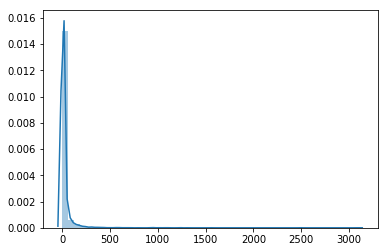

In [10]:
sns.distplot(d[["APPEARANCES"]]);

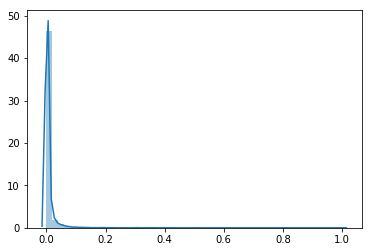

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc_data = sc.fit_transform(d[["APPEARANCES"]])

sns.distplot(sc_data)

In [12]:
d["APPEARANCES_SCALED"] = sc_data

### Преобразование категориальных признаков

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#### Label encoding

In [14]:
le = LabelEncoder()
sex_le = le.fit_transform(d["SEX"])

In [15]:
np.unique(sex_le)

array([0, 1, 2, 3])

In [16]:
le.inverse_transform(np.unique(sex_le))

array(['Female Characters', 'Genderless Characters', 'Male Characters',
       'Transgender Characters'], dtype=object)

In [17]:
d["SEX_INDEX"] = sex_le

#### One Hot encoding

In [18]:
ohe = OneHotEncoder()
sex_ohe = ohe.fit_transform(d[["SEX"]])

In [19]:
sex_ohe.todense()[0:10]

matrix([[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.]])

In [20]:
d["SEX"].head(10)

0      Male Characters
1      Male Characters
2      Male Characters
3      Male Characters
4      Male Characters
5    Female Characters
6      Male Characters
7      Male Characters
8    Female Characters
9      Male Characters
Name: SEX, dtype: object

In [21]:
ohe_names = ohe.get_feature_names()
ohe_names

array(['x0_Female Characters', 'x0_Genderless Characters',
       'x0_Male Characters', 'x0_Transgender Characters'], dtype=object)

In [22]:
for idx, name in enumerate(ohe_names):
    d[name] = sex_ohe[:, idx].todense()

### Получившийся набор данных

In [23]:
d.head(10)

,name,SEX,APPEARANCES,APPEARANCES_SCALED,SEX_INDEX,x0_Female Characters,x0_Genderless Characters,x0_Male Characters,x0_Transgender Characters
0,Batman (Bruce Wayne),Male Characters,3093.0,1.000000,2,0.0,0.0,1.0,0.0
1,Superman (Clark Kent),Male Characters,2496.0,0.806921,2,0.0,0.0,1.0,0.0
2,Green Lantern (Hal Jordan),Male Characters,1565.0,0.505821,2,0.0,0.0,1.0,0.0
3,James Gordon (New Earth),Male Characters,1316.0,0.425291,2,0.0,0.0,1.0,0.0
4,Richard Grayson (New Earth),Male Characters,1237.0,0.399741,2,0.0,0.0,1.0,0.0
5,Wonder Woman (Diana Prince),Female Characters,1231.0,0.397801,0,1.0,0.0,0.0,0.0
6,Aquaman (Arthur Curry),Male Characters,1121.0,0.362225,2,0.0,0.0,1.0,0.0
7,Timothy Drake (New Earth),Male Characters,1095.0,0.353816,2,0.0,0.0,1.0,0.0
8,Dinah Laurel Lance (New Earth),Female Characters,1075.0,0.347348,0,1.0,0.0,0.0,0.0
9,Flash (Barry Allen),Male Characters,1028.0,0.332147,2,0.0,0.0,1.0,0.0
